#Данные
#Test
https://www.kaggle.com/code/sanjaybhatt/difference-between-pca-and-tsne-beginner-level/data

https://drive.google.com/file/d/1O5NT1d3PYZJxQSxx8l2rtnf9BZxrudvh/view?usp=sharing

#Train
https://www.kaggle.com/code/sanjaybhatt/difference-between-pca-and-tsne-beginner-level/data?select=mnist_train.csv

https://drive.google.com/file/d/14vnb8i0xoeCfEYdngkz7GmuRcJQDKLiU/view?usp=sharing

In [1]:
! gdown --id 1O5NT1d3PYZJxQSxx8l2rtnf9BZxrudvh

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1O5NT1d3PYZJxQSxx8l2rtnf9BZxrudvh
To: /content/mnist_test.csv.zip
100% 2.28M/2.28M [00:00<00:00, 145MB/s]


In [2]:
! unzip /content/mnist_test.csv.zip

Archive:  /content/mnist_test.csv.zip
replace mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_test.csv          


In [3]:
! gdown --id 14vnb8i0xoeCfEYdngkz7GmuRcJQDKLiU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14vnb8i0xoeCfEYdngkz7GmuRcJQDKLiU
To: /content/mnist_train.csv.zip
100% 13.7M/13.7M [00:00<00:00, 85.9MB/s]


In [4]:
! unzip /content/mnist_train.csv.zip

Archive:  /content/mnist_train.csv.zip
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_train.csv         


In [5]:
! pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import umap

In [7]:
df = pd.read_csv('mnist_train.csv')

In [8]:
df.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(60000, 785)

Сохраняем label и удаляем его из тренировочного датафрейма, так как это таргет переменная

In [10]:
label = df['label']

In [11]:
df = df.drop(['label'] , axis = 1)

Обрабатываем 15000 записей, чтобы алгоритмы быстрее работали

In [12]:
x = df.head(1500)
y = label.head(1500)

In [13]:
y.value_counts()

7    177
1    172
4    160
9    153
2    144
3    142
6    141
0    140
5    137
8    134
Name: label, dtype: int64

Применяем StandartScaler 

**зачем?**

In [14]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler().fit_transform(x)
std_x.shape

(1500, 784)

In [15]:
type(std_x)

numpy.ndarray

# PCA 2D

In [16]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_x = pca.fit_transform(std_x)

In [17]:
pca_df = np.vstack((pca_x.T , y))
pca_df = pd.DataFrame(pca_df.T , columns=['axis_1' , 'axis_2' , 'label'])

In [18]:
pca_df.head(3)

,axis_1,axis_2,label
0,-0.646024,-3.069061,5.0
1,8.301161,-6.997441,0.0
2,2.571972,8.337440,4.0


In [19]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

# Визуализация того, как раскидал данные PCA (просто куча, ничего непонятно, но очень красиво)

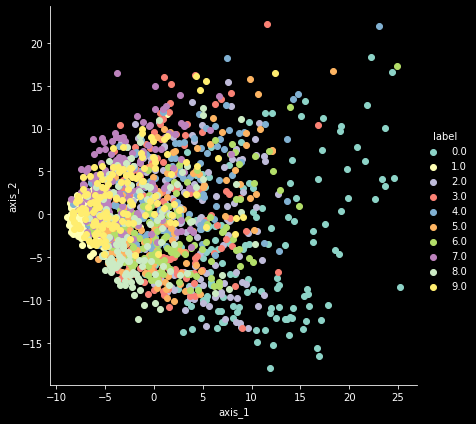

In [20]:
ax = sns.FacetGrid(pca_df , hue='label' , height=6)
ax.map(plt.scatter, 'axis_1' , 'axis_2').add_legend()

# PCA 3D

In [30]:
import plotly.io as pio
pio.renderers.default = "browser"

In [31]:
pca3d = decomposition.PCA()
pca3d.n_components = 3
pca_x_3d = pca3d.fit_transform(std_x)
pca_df_3d = np.vstack((pca_x_3d.T , y))
pca_df_3d = pd.DataFrame(pca_df_3d.T , columns=['axis_1' , 'axis_2' , 'axis_3' , 'label'])

In [23]:
! pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
fig = px.scatter_3d(
    pca_df_3d , x=pca_df_3d.axis_1 , y=pca_df_3d.axis_2 ,  z=pca_df_3d.axis_3 , color = y , size=0.1*np.ones(len(pca_df_3d)) , opacity = 1 , 
    title = 'PCA plot 3D' , 
    labels = {'0' : 'axis_1' , '1' : 'axis_2' , '2' : 'axis_3'},
    width = 650 , height = 500 , 
    template = 'plotly_dark'
)
fig.show()

Error: ignored

# TSNE 2D

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state=0)
tsne_x = tsne.fit_transform(std_x)
tsne_df = np.vstack((tsne_x.T , y))
tsne_df = pd.DataFrame(tsne_df.T , columns=['axis_1' , 'axis_2' , 'label'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



# Визуализация того, как раскидал TSNE (хорошо видны области для каждого label, можно понять, что при axis_1 = X , axis_2 = y, мы получаем label = L, т.е. такая видуализация повышает интерпритируемость и тд.

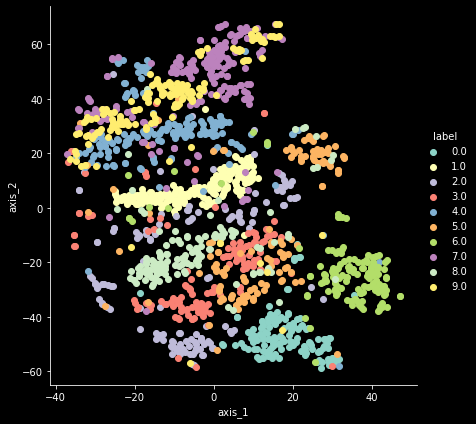

In [26]:
bx = sns.FacetGrid(tsne_df , hue='label' , height=6)
bx.map(plt.scatter, 'axis_1' , 'axis_2').add_legend()

# T-SNE 3D

In [27]:
tsne3d = TSNE(n_components=3 , random_state=0)
tsne_x_3d = tsne3d.fit_transform(std_x)
tsne_df_3d = np.vstack((tsne_x_3d.T , y))
tsne_df_3d = pd.DataFrame(tsne_df_3d.T , columns=['axis_1' , 'axis_2' , 'axis_3' , 'label'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [29]:
fig = px.scatter_3d(
    tsne_df_3d , x=tsne_df_3d.axis_1 , y=tsne_df_3d.axis_2 ,  z=tsne_df_3d.axis_3 , color = y , size=0.1*np.ones(len(tsne_df_3d)) , opacity = 1 , 
    title = 'TSNE plot 3D' , 
    labels = {'0' : 'axis_1' , '1' : 'axis_2' , '2' : 'axis_3'},
    width = 650 , height = 500 , 
    template = 'plotly_dark'
)
fig.show()

Error: ignored

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_x = lda.fit_transform(std_x , y)
lda_df = np.vstack((lda_x.T , y))
lda_df = pd.DataFrame(lda_df.T , columns=['axis_1' , 'axis_2' , 'label'])


# Визуализация того, как раскидал все LDA (лучше, чем pca)

In [ ]:
cx = sns.FacetGrid(lda_df , hue='label' , height=6)
cx.map(plt.scatter , 'axis_1' , 'axis_2').add_legend()

# LDA 3D

In [ ]:
lda3d = LinearDiscriminantAnalysis(n_components=3)
lda_x_3d = lda3d.fit_transform(std_x , y)
lda_df_3d = np.vstack((lda_x_3d.T , y))
lda_df_3d = pd.DataFrame(lda_df_3d.T , columns=['axis_1' , 'axis_2' , 'axis_3' , 'label'])

In [ ]:
fig = px.scatter_3d(
    lda_df_3d , x=lda_df_3d.axis_1 , y=lda_df_3d.axis_2 ,  z=lda_df_3d.axis_3 , color = y , size=0.1*np.ones(len(lda_df_3d)) , opacity = 1 , 
    title = 'LDA plot 3D' , 
    labels = {'0' : 'axis_1' , '1' : 'axis_2' , '2' : 'axis_3'},
    width = 650 , height = 500 , 
    template = 'plotly_dark'
)
fig.show()

# UMAP

In [ ]:
from pandas.core.common import random_state
um = umap.UMAP(random_state=0)
umap_x = um.fit_transform(std_x)
umap_df = np.vstack((umap_x.T , y))
umap_df = pd.DataFrame(umap_df.T  , columns=['axis_1' , 'axis_2' , 'label'])

In [ ]:
ex = sns.FacetGrid(umap_df , hue='label' , height=6)
ex.map(plt.scatter , 'axis_1' , 'axis_2').add_legend()

# UMAP 3D

In [ ]:
um3d = umap.UMAP(random_state=0 , n_components=3)
umap_x_3d = um3d.fit_transform(std_x)
umap_df_3d = np.vstack((umap_x_3d.T , y))
umap_df_3d = pd.DataFrame(umap_df_3d.T  , columns=['axis_1' , 'axis_2' , 'axis_3' , 'label'])

In [ ]:
fig = px.scatter_3d(
    lda_df_3d , x=lda_df_3d.axis_1 , y=lda_df_3d.axis_2 ,  z=lda_df_3d.axis_3 , color = y , size=0.1*np.ones(len(lda_df_3d)) , opacity = 1 , 
    title = 'UMAP plot 3D' , 
    labels = {'0' : 'axis_1' , '1' : 'axis_2' , '2' : 'axis_3'},
    width = 650 , height = 500 , 
    template = 'plotly_dark'
)
fig.show()

# Идеей статьи я вижу сравнение PCA , T-SNE, UMAP, LDA. Понять плюсы и минусы алгоритмов, возможно, немного углубиться в работу кажого (с точки зрения математики). Уже сейчас я могу сказать, что PCA отработал за 1 секунду, T-SNE отрабатывал 2 минуты 50 секунд. Также слышал, что LDA не искажает исходные данные и тд. Материал в общем найти можно, тема не прям чтобы раскрыта. Данные можно взять юфушные. 
